In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import warnings
import tensorflow as tf

from keras.utils import CustomObjectScope

from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.models import Model
from keras.models import load_model
from sklearn.decomposition import PCA
import seaborn as sns

from sklearn.manifold import TSNE

warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
df = pd.read_csv('C:/Users/sasat/PycharmProjects/pythonProject/archive/ratings.csv')

In [3]:
df

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4
...,...,...,...
981751,10000,48386,5
981752,10000,49007,4
981753,10000,49383,5
981754,10000,50124,5


In [4]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)

In [5]:
df_train

,book_id,user_id,rating
341848,3423,4608,2
964349,9811,36373,5
645459,6485,2957,4
74960,750,42400,3
358670,3591,36886,5
...,...,...,...
259178,2594,26266,4
365838,3663,27212,5
131932,1320,31839,4
671155,6746,34952,2


In [6]:
df_test

,book_id,user_id,rating
646451,6495,19643,5
614851,6175,8563,4
974393,9920,52110,3
21471,215,33864,5
272540,2728,16587,3
...,...,...,...
296112,2964,19980,5
94692,947,51233,4
838054,8470,2034,3
287550,2878,30268,5


In [7]:
n_unique_books = len(df.book_id.unique())

In [8]:
n_unique_books

10000

In [9]:
n_unique_users = len(df.user_id.unique())

In [10]:
n_unique_users

53424

In [28]:
#input_dim: Это размер словаря в текстовых данных. Например, если ваши данные целочисленно закодированы в значения от 0 до 10, то размер словаря будет 11 слов.
#output_dim: Это размер векторного пространства, в которое будут вставлены слова. Он определяет размер выходных векторов из этого слоя для каждого слова. Например, это может быть 32 или 100 или даже больше. Проверьте различные значения для вашей проблемы.
#input_length: Это длина входных последовательностей, как вы могли бы определить для любого входного слоя модели Keras. Например, если все ваши входные документы состоят из 1000 слов, это будет 1000.

books_in = Input(shape = (1,), name = 'Books_input')
books_embedding = Embedding(n_unique_books + 1, 32, name = 'Books_embedding')(books_in)
books_flatten = Flatten(name = 'Books_flatten')(books_embedding)

users_in = Input(shape = (1,), name = 'Users_input')
users_embedding = Embedding(n_unique_users + 1, 32, name = 'Users_embedding')(users_in)
users_flatten = Flatten(name = 'Users_flatten')(users_embedding)

concatenation = Concatenate()([books_flatten, users_flatten])

ful_connected1_l =Dense(128, activation = 'relu')(concatenation)
ful_connected2_l = Dense(32, activation = 'relu')(ful_connected1_l)
out_l = Dense(1)(ful_connected2_l)

my_model = Model([users_in, books_in], out_l)
#model.compile(optimizer = 'Adam', loss = 'mse')
my_model.compile('adam', 'mean_squared_error')

my_model.summary()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Books_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
Users_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
Books_embedding (Embedding)     (None, 1, 32)        320032      Books_input[0][0]                
__________________________________________________________________________________________________
Users_embedding (Embedding)     (None, 1, 32)        1709600     Users_input[0][0]                
____________________________________________________________________________________________

In [29]:
if os.path.exists('my_model_final'):
    model = load_model("my_model_final")
    
elif os.path.exists('my_model_final'):
    with CustomObjectScope({'AttentionLayer': AttentionLayer}):
        model = load_model("my_model_final")
    
    
else:
    history = model.fit([df_train.user_id, df_train.book_id], df_train.rating, epochs = 6, verbose = 1)
    model.save('my_model_final')
    plt.plot(history.history['loss'])
    plt.xlabel('epochs')
    plt.ylabel('training error')
        
    

In [30]:
books_embed = my_model.get_layer('Books_embedding')
books_embed_weights = my_model.get_weights()[0]
books_embed_weights[:5]


array([[-1.13132820e-02,  3.17126401e-02,  1.86544545e-02,
        -4.42245379e-02, -3.10097225e-02, -2.04692241e-02,
         4.97788452e-02,  1.01287737e-02,  1.24527141e-03,
        -3.75964530e-02, -2.64768489e-02,  1.26571581e-03,
         4.61962111e-02,  1.36147402e-02,  1.81394108e-02,
        -3.90801430e-02, -1.89652685e-02,  2.30958201e-02,
         2.68645175e-02,  1.01412758e-02, -2.22159382e-02,
         1.28346793e-02,  5.46284765e-03, -3.46564539e-02,
        -1.25441067e-02, -4.26365733e-02, -6.00535795e-03,
         2.39913724e-02,  7.06002861e-03, -3.23832035e-03,
         2.08917893e-02,  9.20521095e-03],
       [-3.87331247e-02, -3.65384668e-03, -8.04651529e-04,
         4.90875728e-02, -3.19341645e-02,  4.74114083e-02,
         4.07434367e-02,  3.55153158e-03,  4.74728644e-04,
        -3.36566567e-02, -1.62563547e-02,  4.44006585e-02,
         4.74767573e-02, -3.48132849e-03, -3.90957221e-02,
        -4.31540497e-02,  8.84626061e-03, -5.19664213e-03,
        -1.37

array([[ 0.5413235 , -0.09347191],
       [-0.2743046 ,  0.33274442],
       [-0.05968682, -0.18901324],
       ...,
       [ 0.02829347,  0.03966888],
       [-0.09968608, -0.18162252],
       [ 0.16549706, -0.20613736]], dtype=float32)

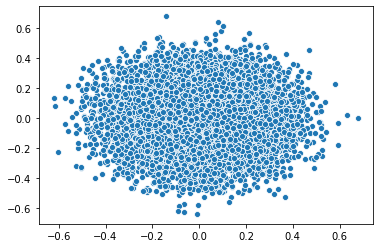

In [45]:
pca = PCA(n_components = 2)
pca_res =  pca.fit_transform(books_embed_weights)
pca_res
sns.scatterplot(x = pca_res[:, 0], y = pca_res[:, 1])

In [32]:
books_embed_weights = books_embed_weights / np.linalg.norm(books_embed_weights, axis = 1).reshape((-1, 1))
books_embed_weights[0][:10]
np.sum(np.square(books_embed_weights[0]))

array([-0.07907855,  0.22166772,  0.1303925 , -0.30912447, -0.2167544 ,
       -0.14307754,  0.34794843,  0.07079897,  0.0087043 , -0.2627949 ],
      dtype=float32)

0.9999999

In [33]:
books_embed_weights

array([[-0.07907855,  0.22166772,  0.1303925 , ..., -0.02263549,
         0.14603122,  0.06434337],
       [-0.21023782, -0.01983255, -0.00436753, ..., -0.16436586,
        -0.09574114,  0.2545339 ],
       [ 0.1706215 ,  0.264528  , -0.16227418, ..., -0.27585933,
        -0.16778846,  0.26011494],
       ...,
       [-0.13172324,  0.27296335,  0.26308525, ..., -0.18319269,
         0.2078501 , -0.21629664],
       [-0.2506523 , -0.14995761,  0.13292432, ..., -0.07419626,
        -0.15070386,  0.07774736],
       [-0.01317493,  0.20515864, -0.2403846 , ...,  0.26409617,
         0.15886015,  0.02895299]], dtype=float32)

array([[-0.23446444,  0.0304619 ],
       [-0.04094175, -0.34718186],
       [ 0.16818693, -0.27857542],
       ...,
       [-0.21284592, -0.01818755],
       [ 0.18999726, -0.04525387],
       [ 0.05068271,  0.36749405]], dtype=float32)

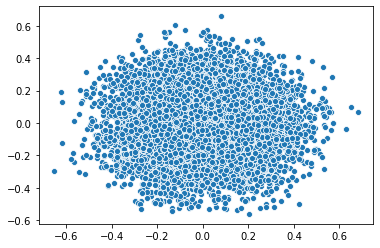

In [34]:
pca = PCA(n_components = 2)
pca_res =  pca.fit_transform(books_embed_weights)
pca_res
sns.scatterplot(x = pca_res[:, 0], y = pca_res[:, 1])

In [107]:
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 45, n_iter = 300 )
tsne_res = tsne.fit_transform(books_embed_weights)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.100s...
[t-SNE] Computed neighbors for 10001 samples in 6.129s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.302447
[t-SNE] KL divergence after 50 iterations with early exaggeration: 94.342262
[t-SNE] KL 

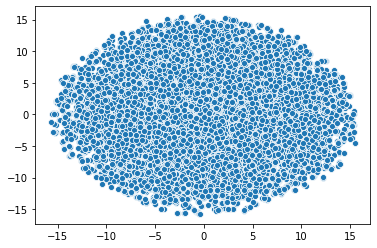

In [108]:
sns.scatterplot(x = tsne_res[:,0], y= tsne_res[:,1])

In [109]:
books_id = np.array(list(set(df.book_id)))
books_id[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [140]:
users = np.array([3 for i in range(len(books_id))])

In [141]:
pd.DataFrame(users)

,0
0,3
1,3
2,3
3,3
4,3
...,...
9995,3
9996,3
9997,3
9998,3


In [142]:
len(books_id)


10000

In [148]:
prediction = model.predict([users, books_id])
prediction = np.array([i[0] for i in prediction])
recommended_b_id = (-prediction).argsort()[:3]
recommended_b_id
prediction[recommended_b_id]



array([9841, 5343, 3752], dtype=int64)

array([4.6357794, 4.5619855, 4.5298605], dtype=float32)

In [115]:
books = pd.read_csv('C:/Users/sasat/PycharmProjects/pythonProject/archive/books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [149]:
books[books['id'].isin(recommended_b_id)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3751,3752,140302,477597,1952109,141,NaN,NaN,Agatha Christie,1924.0,Poirot Investigates,...,15476,29408,779,216,1003,6529,10450,11210,https://images.gr-assets.com/books/1359475912m...,https://images.gr-assets.com/books/1359475912s...
5342,5343,7679,7679,2651704,77,60092572,9.780060e+12,Michael Crichton,1972.0,The Terminal Man,...,19072,20590,619,403,2792,9098,5935,2362,https://images.gr-assets.com/books/1461056182m...,https://images.gr-assets.com/books/1461056182s...
9840,9841,15101,15101,876908,55,380815923,9.780381e+12,Joanne Harris,1999.0,Blackberry Wine,...,9558,11107,699,163,755,3215,4220,2754,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
